In [2]:
# 案例参考https://zhuanlan.zhihu.com/p/37452654
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import uniform
import matplotlib.pyplot as plt

# 对应于人体0~10 共11颗牙齿分布对应的蜱虫数量和概率
num = 11
x =  np.array([[2,3,5,14,16,15,12,8,10,8,7],[0.02,0.03,0.05,0.14,0.16,0.15,0.12,0.08,0.1,0.08,0.07]])
p = x[1,:]
print(x)
print(x[0,:].sum(),x[1,:].sum())

[[ 2.    3.    5.   14.   16.   15.   12.    8.   10.    8.    7.  ]
 [ 0.02  0.03  0.05  0.14  0.16  0.15  0.12  0.08  0.1   0.08  0.07]]
100.0 1.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34609 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34411 missing from current font.
  font.set_te

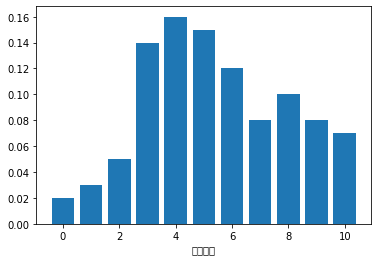

In [3]:
plt.bar(np.arange(num),x[1,:])

# plt.legend()b
plt.xlabel('number of teeth')
plt.xlabel('蜱虫概率')
plt.show()

[ 0.   1.1  2.2  3.3  4.4  5.5  6.6  7.7  8.8  9.9 11. ]
[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


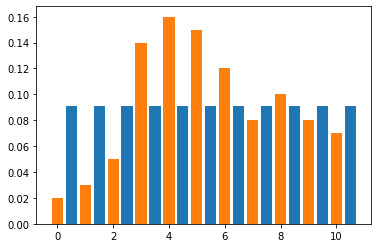

In [4]:
#使用均匀分布建模
# 手动建模
# p1 = 1/num * np.ones(num)
# plt.bar(np.arange(num)+0.5,p1,width = 0.4)

# 使用函数建模
loc = 0
scale = 11
#ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
x1 = np.linspace(uniform.ppf(0.0,loc,scale),uniform.ppf(1,loc,scale),11)
print(x1)
# plt.plot(x, uniform.pdf(x,loc,scale),'o',label = 'uniform')
# plt.title(u'均匀分布概率密度函数')
p1 = uniform.pdf(x1,loc,scale)
print(p1)
plt.bar(np.arange(num)+0.5,uniform.pdf(x1,loc,scale),width = 0.4)
plt.bar(np.arange(num),x[1,:],width = 0.4)
plt.show()

0.544
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.77261030e-04 2.32616229e-03 1.38753540e-02 4.96591618e-02
 1.18485018e-01 1.97890766e-01 2.36080212e-01 2.01171108e-01
 1.19996801e-01 4.77180263e-02 1.13853536e-02]


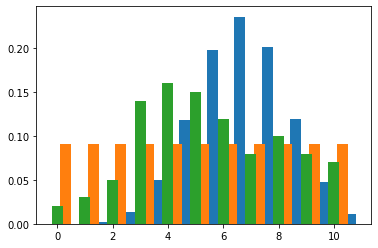

[1.77261030e-04 2.32616229e-03 1.38753540e-02 4.96591618e-02
 1.18485018e-01 1.97890766e-01 2.36080212e-01 2.01171108e-01
 1.19996801e-01 4.77180263e-02 1.13853536e-02]


In [5]:
#使用二项分布建模
# 二项分布 E=np, D = np(1-p) 
# 本例中n指的是最大牙齿数，所以为num-1 ,也就是10
# 先通过实际数据算出均值，进而求出概率p
n2 = num-1
mean2 = np.inner(np.arange(num),x[1,:]);
# print(mean2)
p2 = mean2 / (n2)
print(p2)
# x2 = np.arange(0,num) #11种可能出现的结果
x2 = np.arange(binom.ppf(0.00001, num, p2),binom.ppf(1, num, p2))  #另一种模式
print(x2)
print(binom.pmf(x2,num,p2))

plt.bar(np.arange(num)+0.6,binom.pmf(x2,num,p2),width = 0.4)
plt.bar(np.arange(num)+0.3,uniform.pdf(x1,loc,scale),width = 0.4)
plt.bar(np.arange(num),x[1,:],width = 0.4,label = 'true')
plt.show()

p2 = binom.pmf(x2,num,p2)
print(p2)

In [10]:
#计算KL散度
# 利用scipy API进行计算
# scipy计算函数可以处理非归一化情况，因此这里使用
# scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可

KL = stats.entropy(p, p1) 
print('scipy:',KL)

# 编程实现
KL = 0.0
for i in range(11):
    KL += p[i] * np.log(p[i] / p1[i])
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print('手动  ',KL)



KL = stats.entropy(p, p2) 
print('scipy:',KL)
KL = 0.0
for i in range(11):
    KL += p[i] * np.log(p[i] / p2[i])
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print('手动  ',KL)

scipy: 0.13667971094966938
手动   0.13667971094966938
scipy: 0.3809585322411612
手动   0.382194070399698


In [34]:
# 编程实现
KL1 = np.zeros(11)
KL2 = np.zeros(11)
p2= p1
print(stats.entropy(p[0:11],p2[0:11]))
for i in range(11):
    KL1[i] = p[i] * np.log(p[i] / p2[i])
    KL2[i] = stats.entropy(p[i],p2[i])
    print(KL2[i],stats.entropy(p[i],p2[i]))
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print(KL1,np.sum(KL1))
print(KL2)
print(p,p2)

0.13667971094966938
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
[-0.03028255 -0.03325988 -0.02989185  0.06044954  0.09045021  0.07511629
  0.03331581 -0.01022667  0.00953102 -0.01022667 -0.01829553] 0.13667971094966938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.02 0.03 0.05 0.14 0.16 0.15 0.12 0.08 0.1  0.08 0.07] [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
